# Análise da relação entre os jogos da plataforma Steam e sua repercusão na plataforma de streaming Twitch

## Descrição:

Nesta projeto apuramos informações retiradas do site TwitchMetric e SteamDB para verificar correlaçõs entre os jogos da Steam e as suas performances na plataforma de streaming Twitch.


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

# Desabilitar os avisos de depreciação
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
from library.conexao import Scraper
conexao = Scraper()
df_steam = conexao.get_dados_steam()
df_twitch = conexao.get_dados_twitch()
conexao.fechar_navegador()

### **Análise e Limpesa do Dados Twitch**

In [3]:
df_twitch.head()

,Jogo,Viewer Hours,Avg Live Channels,Peak Viewers,Avg Viewers
0,Just Chatting,273771477.0,1459.0,879985.0,380414.0
1,Grand Theft Auto V,125977774.0,712.0,443595.0,175050.0
2,League of Legends,99889178.0,495.0,441597.0,138799.0
3,VALORANT,82798065.0,700.0,363995.0,115077.0
4,Dota 2,47381569.0,146.0,343928.0,65884.0


In [4]:
df_twitch.dtypes

Jogo                  object
Viewer Hours         float64
Avg Live Channels    float64
Peak Viewers         float64
Avg Viewers          float64
dtype: object

In [5]:
df_twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jogo               100 non-null    object 
 1   Viewer Hours       50 non-null     float64
 2   Avg Live Channels  50 non-null     float64
 3   Peak Viewers       50 non-null     float64
 4   Avg Viewers        50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [6]:
#df_twitch.fillna(0, inplace=True)
#df_twitch = df_twitch.dropna()

In [7]:
#df_twitch.iloc[:,1:]=df_twitch.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', '')))
#df_twitch.head(5)

In [8]:
df_twitch[['Jogo','Peak Viewers']].sort_values(by="Peak Viewers", ascending=False).head(5)

,Jogo,Peak Viewers
10,Special Events,3461621.0
0,Just Chatting,879985.0
1,Grand Theft Auto V,443595.0
2,League of Legends,441597.0
11,Apex Legends,437570.0


In [9]:
df_twitch.sort_values(by='Avg Live Channels', ascending=False).head(5)

,Jogo,Viewer Hours,Avg Live Channels,Peak Viewers,Avg Viewers
0,Just Chatting,273771477.0,1459.0,879985.0,380414.0
1,Grand Theft Auto V,125977774.0,712.0,443595.0,175050.0
3,VALORANT,82798065.0,700.0,363995.0,115077.0
2,League of Legends,99889178.0,495.0,441597.0,138799.0
9,Fortnite,30283837.0,438.0,155340.0,42100.0


In [10]:
df_twitch.head

<bound method NDFrame.head of                          Jogo  Viewer Hours  Avg Live Channels  Peak Viewers  \
0               Just Chatting   273771477.0             1459.0      879985.0   
1          Grand Theft Auto V   125977774.0              712.0      443595.0   
2           League of Legends    99889178.0              495.0      441597.0   
3                    VALORANT    82798065.0              700.0      363995.0   
4                      Dota 2    47381569.0              146.0      343928.0   
..                        ...           ...                ...           ...   
95                 Moth House           NaN                NaN           NaN   
96                      Roots           NaN                NaN           NaN   
97        Master of the Lamps           NaN                NaN           NaN   
98  3D BILLARD Pool & Snooker           NaN                NaN           NaN   
99                Terminal 81           NaN                NaN           NaN   

    Avg V

In [11]:
print("Correlação - médias canais para média de viewers",(df_twitch['Avg Live Channels'].astype(float)).corr(df_twitch['Avg Viewers']))
print("Correlação - pico para média de viewers",(df_twitch['Peak Viewers'].astype(float)).corr(df_twitch['Avg Live Channels']))

Correlação - médias canais para média de viewers 0.9386980986923289
Correlação - pico para média de viewers 0.8425827542523214


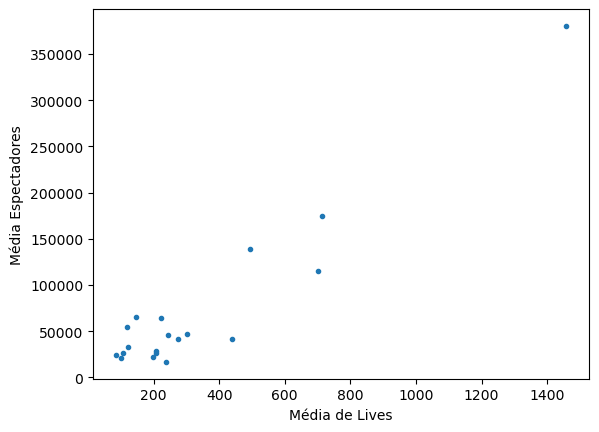

In [12]:
df = df_twitch.dropna()
x = df['Avg Live Channels']
y = df['Avg Viewers']

plt.xlabel("Média de Lives")
plt.ylabel("Média Espectadores")

print(plt.plot(x,y,'.'))

### **Análise Steam**

In [13]:
df_steam.head()

,Jogo,jogadores_at_moment,24h_peek,all-time_peak
0,Counter-Strike: Global Offensive,911200,1175999,1818773
1,Dota 2,411137,602377,1295114
2,Apex Legends,245408,351055,624473
3,PUBG: BATTLEGROUNDS,242667,344828,3257248
4,NARAKA: BLADEPOINT,155505,220109,264406


In [14]:
df_steam.dtypes

Jogo                   object
jogadores_at_moment    object
24h_peek               object
all-time_peak          object
dtype: object

In [15]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Jogo                 100 non-null    object
 1   jogadores_at_moment  100 non-null    object
 2   24h_peek             100 non-null    object
 3   all-time_peak        100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [16]:
#df_steam.iloc[:, 1:] = df_steam.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', '')))
df_steam.head()

,Jogo,jogadores_at_moment,24h_peek,all-time_peak
0,Counter-Strike: Global Offensive,911200,1175999,1818773
1,Dota 2,411137,602377,1295114
2,Apex Legends,245408,351055,624473
3,PUBG: BATTLEGROUNDS,242667,344828,3257248
4,NARAKA: BLADEPOINT,155505,220109,264406


In [17]:
df_steam.sort_values(by="24h_peek", ascending=False)

,Jogo,jogadores_at_moment,24h_peek,all-time_peak
0,Counter-Strike: Global Offensive,911200,1175999,1818773
1,Dota 2,411137,602377,1295114
2,Apex Legends,245408,351055,624473
3,PUBG: BATTLEGROUNDS,242667,344828,3257248
4,NARAKA: BLADEPOINT,155505,220109,264406
...,...,...,...,...
96,World of Warships,8520,12997,411338
88,Battlefield 1 ™,9575,12739,53714
89,Slay the Spire,9210,11844,33086
85,Oxygen Not Included,9979,11545,27486


In [18]:
print("Maior Pico Total de Jogadores: ",df_steam['24h_peek'].sum())

Maior Pico Total de Jogadores:  6203968


 Efetuando mesclagem das duas tabelas pela Nome

In [19]:
df_merge = df_twitch.merge(df_steam,on='Jogo', how ='inner')
df_merge

,Jogo,Viewer Hours,Avg Live Channels,Peak Viewers,Avg Viewers,jogadores_at_moment,24h_peek,all-time_peak
0,Grand Theft Auto V,125977774.0,712.0,443595.0,175050.0,121265,172179,364548
1,Dota 2,47381569.0,146.0,343928.0,65884.0,411137,602377,1295114
2,Counter-Strike: Global Offensive,45928135.0,222.0,401070.0,63848.0,911200,1175999,1818773
3,Apex Legends,29694408.0,274.0,437570.0,41290.0,245408,351055,624473
4,Dead by Daylight,16208206.0,355.0,NaN,22537.0,33748,49479,105093
5,Black Desert,12941634.0,94.0,NaN,17995.0,22113,29874,60395
6,Rust,10775615.0,83.0,92841.0,NaN,71116,120435,245243
7,Rocket League,8867450.0,81.0,290895.0,NaN,12982,38327,147632
8,BattleBit Remastered,8687219.0,57.0,82741.0,NaN,23417,40168,87323
9,PUBG: BATTLEGROUNDS,6928710.0,86.0,88724.0,NaN,242667,344828,3257248


Quantos do TOP 10 das maiores categorias de Média de Lives estão nos mais jogados da Steam

In [20]:
df_merge = df_twitch.sort_values(by="Avg Live Channels", ascending=False).head(10).merge(df_steam,on='Jogo', how ='inner')
df_merge

,Jogo,Viewer Hours,Avg Live Channels,Peak Viewers,Avg Viewers,jogadores_at_moment,24h_peek,all-time_peak
0,Grand Theft Auto V,125977774.0,712.0,443595.0,175050.0,121265,172179,364548
1,Dead by Daylight,16208206.0,355.0,NaN,22537.0,33748,49479,105093
2,Apex Legends,29694408.0,274.0,437570.0,41290.0,245408,351055,624473


In [21]:
cores = ["#8179AF","#38A3A5","#255056","#2F4858","#A3586D"]
plt.rcParams["axes.prop_cycle"] = plt.cycler(
    color=cores)

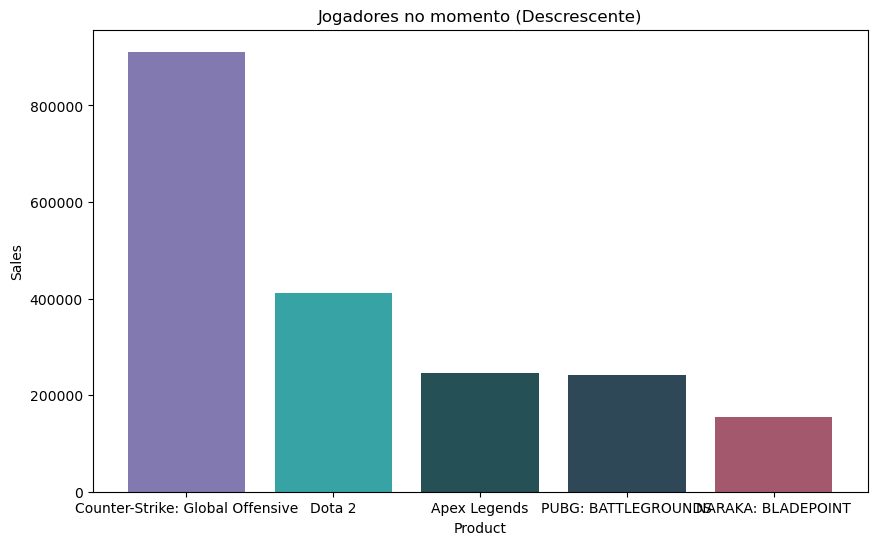

In [22]:
df = df_steam.sort_values(by="jogadores_at_moment", ascending = False)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(df['Jogo'].head(5), df['jogadores_at_moment'].head(5), color = cores)
ax1.set_title("Jogadores no momento (Descrescente)")
ax1.set_xlabel("Product")
ax1.set_ylabel("Sales")
plt.show()

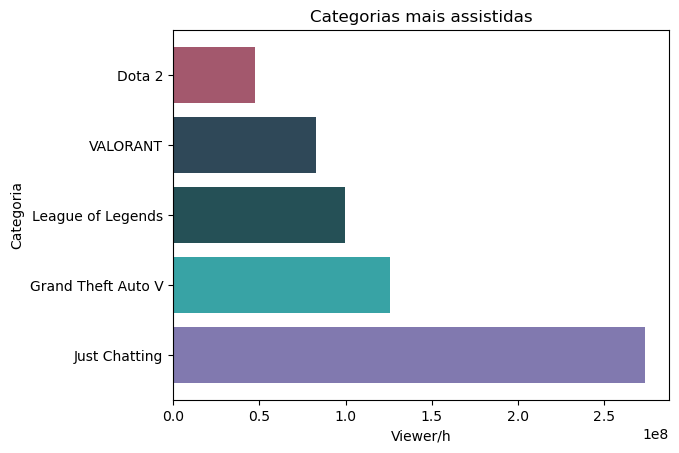

In [23]:
df = df_twitch.sort_values(by="Viewer Hours", ascending=False)
fig2, ax2 = plt.subplots()
ax2.barh(df['Jogo'].head(5), df['Viewer Hours'].head(5), color = cores)
ax2.set_title("Categorias mais assistidas")
ax2.set_xlabel("Viewer/h")
ax2.set_ylabel("Categoria")
plt.show()

Text(0.5, 1.0, 'Game \n all time peak')

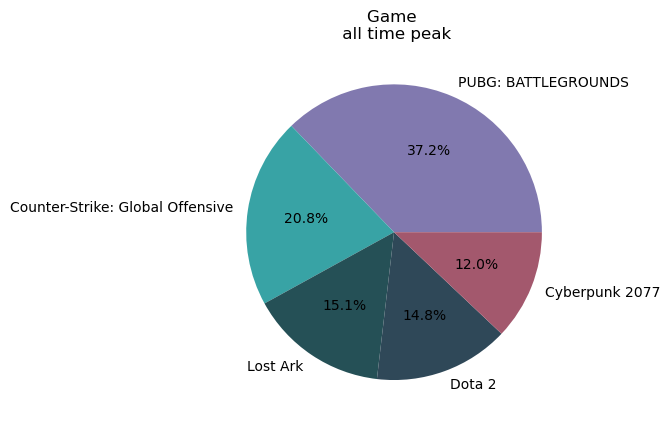

In [24]:
df = df_steam.sort_values(by="all-time_peak", ascending=False)
fig3, ax3 = plt.subplots()
ax3.pie(df['all-time_peak'].head(5), labels=df['Jogo'].head(5), autopct='%1.1f%%')
ax3.set_title("Game \n all time peak")

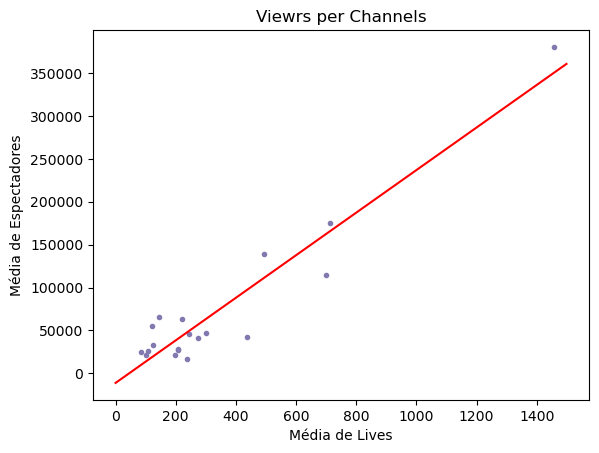

In [25]:
df = df_twitch.dropna()

(a, b) = np.polyfit(x, y, deg = 1)
x = np.arange(0,1500,1	)
y = a*x+b

fig4, ax4 = plt.subplots()
ax4.plot(df['Avg Live Channels'].astype(float),df['Avg Viewers'].astype(float),'.')
ax4.set_title("Viewrs per Channels")
ax4.set_xlabel("Média de Lives")
ax4.set_ylabel("Média de Espectadores")
plt.plot(x,y,'r')

In [26]:
df_merge = df_twitch.merge(df_steam,on='Jogo', how ='inner')
df_merge['Viewer Hours'].astype(float).corr(df_merge['jogadores_at_moment'].astype(float))

0.35316526204392207

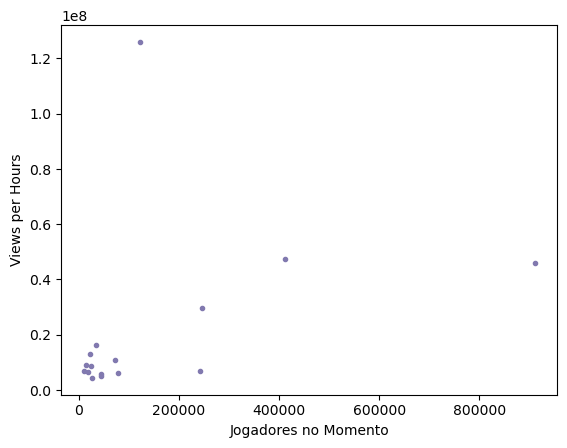

In [27]:
df = df_merge
x = df_merge['jogadores_at_moment']
y = df_merge['Viewer Hours']

plt.xlabel("Jogadores no Momento")
plt.ylabel("Views per Hours")

print(plt.plot(x,y,'.'))